# Double 7's Portfolio (Short Term Trading Strategies that Work)

    1. The Security is above its 200-day moving average or X-day ma
    2. The Security closes at a 7-day low, buy.
    3. If the Security closes at a 7-day high, sell your long position.
    
    (For a Portfolio of securities.)

In [16]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd

import pinkfish as pf
import strategy

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [17]:
# Set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [18]:
# Symbol Lists
SP500_Sectors = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
Mixed_Asset_Classes = ['IWB', 'SPY', 'VGK', 'IEV', 'EWJ', 'EPP', 'IEF', 'SHY', 'GLD']
FANG_Stocks = ['FB', 'AMZN', 'NFLX', 'GOOG']
Stocks_Bonds_Gold = ['SPY', 'QQQ', 'TLT', 'GLD']

# Pick one of the above
symbols = Stocks_Bonds_Gold

capital = 10000
start = datetime.datetime(*pf.ALPHA_BEGIN)
#start = datetime.datetime(*pf.SP500_BEGIN)
end = datetime.datetime.now()

In [19]:
options = {
    'use_adj' : False,
    'use_cache' : True,
    'stop_loss_pct' : 0.15,
    'margin' : 3.0,
    'period' : 7,
    'use_regime_filter' : True,
    'use_vola_weight' : True
}

Run Strategy

In [20]:
s = strategy.Strategy(symbols, capital, start, end, options=options)
s.run()

STOP LOSS!!!
STOP LOSS!!!


View log DataFrames: raw trade log, trade log, and daily balance

In [21]:
s.rlog.head()

,date,seq_num,price,shares,entry_exit,direction,symbol
0,2005-09-07,0,93.60,93,entry,LONG,TLT
0,2005-09-14,1,39.18,195,entry,LONG,QQQ
0,2005-09-14,2,123.21,63,entry,LONG,SPY
1,2005-09-29,3,39.20,195,exit,LONG,QQQ
1,2005-09-29,4,122.66,63,exit,LONG,SPY


In [22]:
s.tlog.tail()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
196,2024-07-17,481.77,2024-08-12,451.38,-30.39,-5895.66,194,143468.01,LONG,QQQ
184,2024-07-18,552.66,2024-08-12,533.27,-19.39,-6030.28,311,137437.74,LONG,SPY
160,2024-07-19,221.73,2024-07-31,226.55,4.82,2173.82,451,139611.56,LONG,GLD
122,2024-07-22,92.65,2024-07-29,93.49,0.84,982.80,1170,140594.36,LONG,TLT
161,2024-08-07,220.55,2024-08-12,228.41,7.86,4425.18,563,145019.54,LONG,GLD


In [23]:
s.dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2024-08-15,155019.54,155019.54,155019.54,0,155019.54,1.00,-
2024-08-16,155019.54,155019.54,155019.54,0,155019.54,1.00,-
2024-08-19,155019.54,155019.54,155019.54,0,155019.54,1.00,-
2024-08-20,155019.54,155019.54,155019.54,0,155019.54,1.00,-
2024-08-21,155019.54,155019.54,155019.54,0,155019.54,1.00,-


Generate strategy stats - display all available stats

In [24]:
pf.print_full(s.stats)

start                                                    2005-09-02
end                                                      2024-08-21
beginning_balance                                             10000
ending_balance                                            155019.54
total_net_profit                                          145019.54
gross_profit                                              320607.41
gross_loss                                               -175587.88
profit_factor                                                  1.83
return_on_initial_capital                                   1450.20
annual_return_rate                                            15.55
trading_period                           18 years 11 months 19 days
pct_time_in_market                                            64.93
margin                                                         3.00
avg_leverage                                                   1.27
max_leverage                                    

View Performance by Symbol

,cumul_total,weight,pct_cumul_total,relative_performance
GLD,"$26,704.63",0.25,0.18,0.74
QQQ,"$54,608.89",0.25,0.38,1.51
TLT,"$25,090.14",0.25,0.17,0.69
SPY,"$38,615.88",0.25,0.27,1.07
TOTAL,"$145,019.54",1.00,1.00,1.00


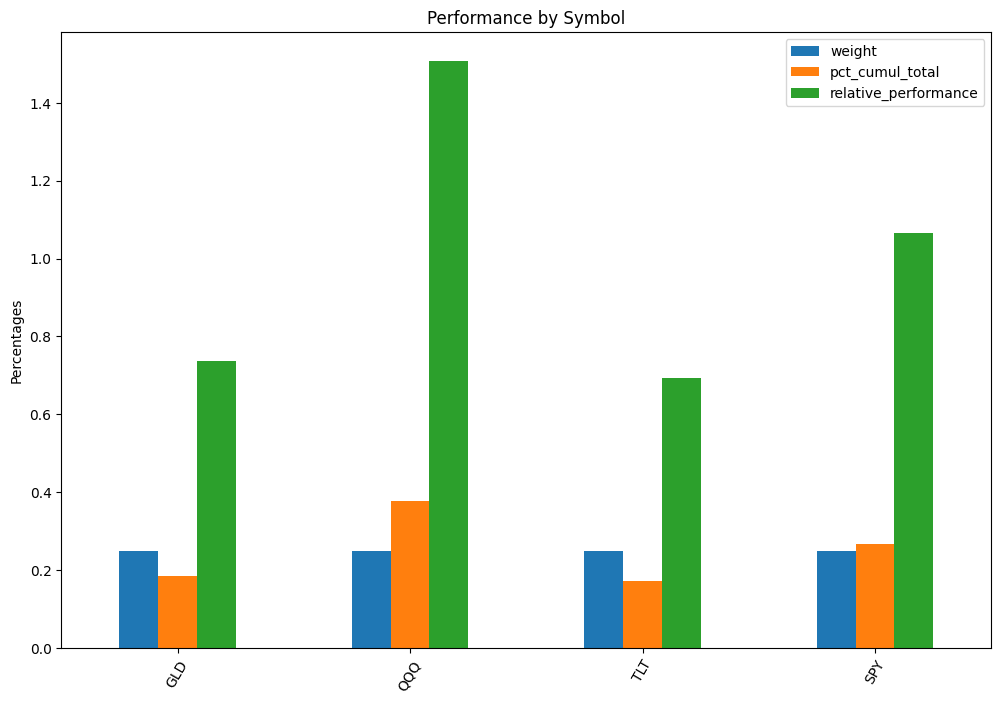

In [25]:
weights = {symbol: 1 / len(symbols) for symbol in symbols}
totals = s.portfolio.performance_per_symbol(weights=weights)
totals

,GLD,QQQ,TLT,SPY
GLD,1.00,0.04,0.17,0.06
QQQ,0.04,1.00,-0.28,0.92
TLT,0.17,-0.28,1.00,-0.33
SPY,0.06,0.92,-0.33,1.00


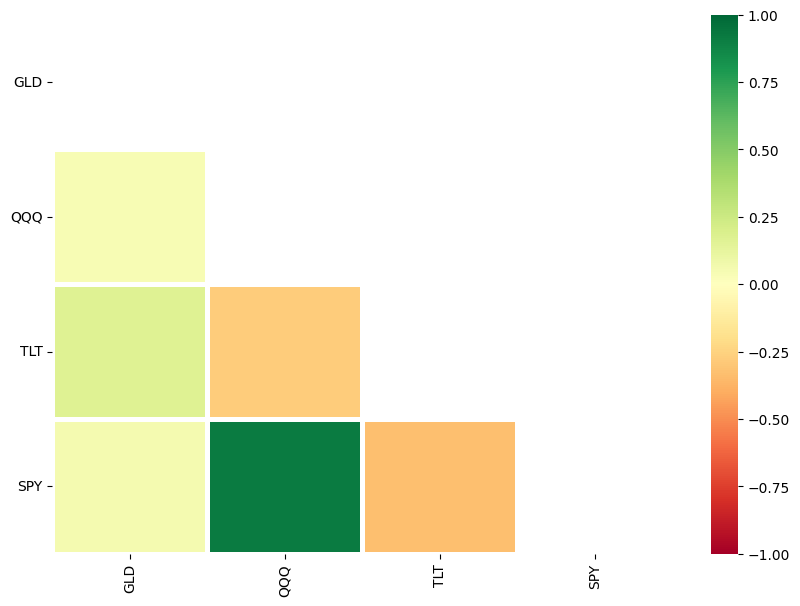

In [26]:
corr_df = s.portfolio.correlation_map(s.ts)
corr_df

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [27]:
benchmark = pf.Benchmark('SPY', s.capital, s.start, s.end, use_adj=True)
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

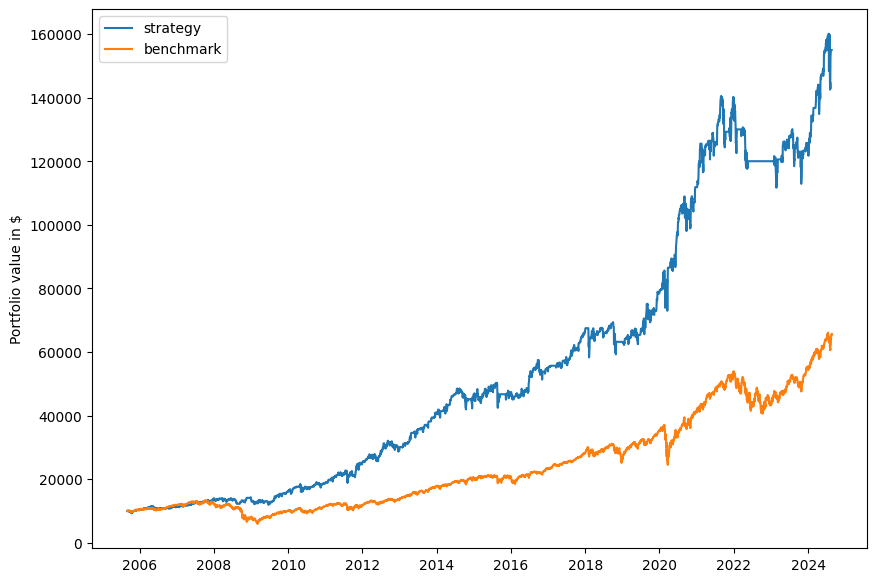

In [28]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,15.55,10.43
max_closed_out_drawdown,-20.53,-55.03
annualized_return_over_max_drawdown,0.76,0.19
best_month,20.93,23.46
worst_month,-14.78,-30.95
sharpe_ratio,0.91,0.61
sortino_ratio,0.99,0.74
monthly_std,3.81,4.58
annual_std,14.57,16.61


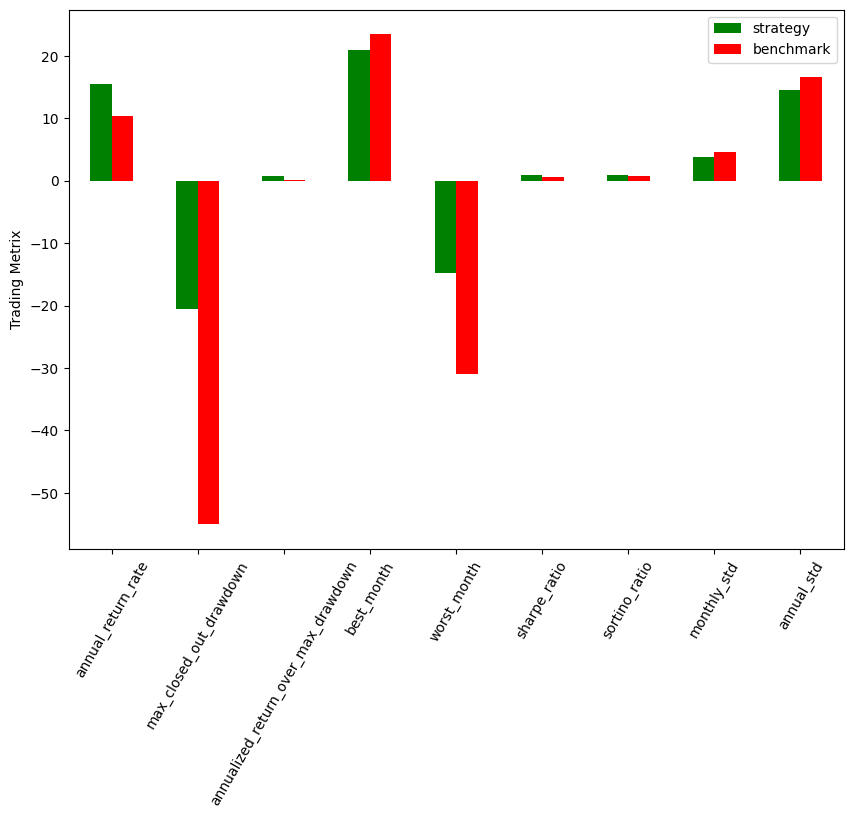

In [29]:
df = pf.plot_bar_graph(s.stats, benchmark.stats)
df

Analysis: Kelly Criterian

In [30]:
kelly = pf.kelly_criterion(s.stats, benchmark.stats)
kelly

sharpe_ratio            0.91
sharpe_ratio_max        0.96
sharpe_ratio_min        0.86
strategy risk           0.15
instrument risk         0.17
optimal target risk     0.91
half kelly criterion    0.46
aggressive leverage     5.48
moderate leverage       2.74
conservative leverage   2.59
dtype: float64